# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question (I did #5).
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about? 
  
      This paper fouses on the difficulties in tidying data and how from the outside it can be complicated. It goes into detail about the key tools needed to be used during data cleaning to create a more consistent data structure to clean messy data efficiently. 
  
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  
      The "tidy data standard" was designed to take the tools needed for cleaning data and simplifying them to bring them together. It removes the necessity of starting from scratch every time. 
      
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  
      The first sentence is referencing how all tidy data contains three things; each variable forms a column, each observation froms a row, and each observational unit forms a table. Messy data, on the other hand, can be any other arrangement, meaning that there is no limit to how messy the data is. The second sentence means that when comparing all of the variables and observations, it can be difficult to determine which is what because they can fall into subcategories. It is the most easy to compare variables rather than rows, and observations rather than columns. 
  
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  
      Values: qualitative (strings) or quantitative (numbers).
      Variables: One variable will contain all of the values that measure a single attribute (can use multiple units).
      Observations: One observation will contain all values that are measured on the same unit across multiple attributes. 
  
  5. How is "Tidy Data" defined in section 2.3?
  
      Tidy data contains columns and tables that are matched up with the respective observations, variables, and types. Variable --> column, observation --> row, observational unit --> table.
  
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  
      The five most common problems according to section 3:
      • Column headers are values, not variable names.
      • Multiple variables are stored in one column.
      • Variables are stored in both rows and columns.
      • Multiple types of observational units are stored in the same table.
      • A single observational unit is stored in multiple tables.
      Data in table 4 is considered messy because the rows and the columns both contain variables, and the column headers are values instead of variable neames. Melting a data set is turning the columns into rows for cleaning purposes. 

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  
      Table 11 is messy because the headers of the columns are values, while table 12 has column headers of variable names of which the values are shown below. In other words, they melted the data set by changing the column headers into the rows. 
  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
  
      The chicken and egg problem is that tidying data requires the data tidying tools, and the data tidying tools are only focused on tidying data, so working with each of these things individually may never improve the work. He hopes that in the future these tools can be improved and the framework can be continuously developed. 

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                         float64
Review Scores Rating          floa

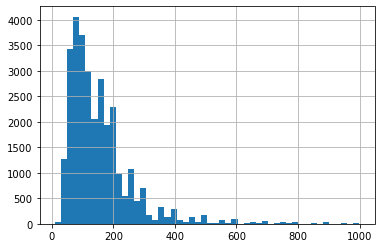

In [17]:
#problem 1
import numpy as np
import pandas as pd
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print(df.dtypes, '\n') # See what type of variable price is
var = 'Price'
df[var].str.replace(',','') #I did this because the numbers over 999 have a comma in them, which causes the type of the variable to become an object.

# Coerce a variable to numeric:
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric
print(df.dtypes, '\n')
# Create a missing value dummy:
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df[var].describe(),'\n') # Describe the numeric variable to see if it is still 'object'
df[var].hist(bins = 50) # Histogram of the variable values (the max value is 999, I am not sure how to fix this)
print('Total Missings: \n', sum(df[var+'_nan']),'\n') # There are 181 missing values

In [13]:
# Problem 2 Categorical variable: For the ./data/sharks.csv data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
import numpy as np
import pandas as pd
df = pd.read_csv('./data/sharks.csv',low_memory=False)
var = 'Type'
print(df.dtypes, '\n') # The types of the variables
print(df[var].unique(),'\n') # determine the categories under type
print(df[var].value_counts(), '\n')
df[var] = df[var].replace( ['Boat','Boating', 'Boatomg', 'Watercraft'], 'Watercraft') #Combine all of the boating categories
df[var] = df[var].replace( ['Unverified', 'Unconfirmed', 'Under investigation', 'Questionable', 'Invalid'], 'Unconfirmed') #Combine all unknown categories
print(df[var].value_counts()) # I ended with five categories instead of twelve which is way better, but am unsure whether boating and sea disaster fall under provoked or unprovoked.

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Boatomg                   1
Under investigation       1
Unconfirmed               1
Unverified                1
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Unconfirmed      565
Watercraft       344
Sea Disaster     239
Name: Type, dtype: int64


In [25]:
#problem 3 Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.
import numpy as np
import pandas as pd
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
var = 'WhetherDefendantWasReleasedPretrial'
# print(df.loc[1:30,(var)],'\n') # to see what the missing data may look like
print(df[var].value_counts()) # show the values under each category - discovered 9 which should not be there
df[var] = df[var].replace( [9], np.nan) # Remove and replace the 9 with np.nan because it shouldn't be there
print(df[var].value_counts()) # yay 1s and 0s which is good!

1    19154
0     3801
9       31
Name: WhetherDefendantWasReleasedPretrial, dtype: int64
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


In [16]:
#problem 4 Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
import numpy as np
import pandas as pd
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
var = 'ImposedSentenceAllChargeInContactEvent'
print(df.loc[1:10,(var)],'\n')#look at some of the data to see what the outputs are
print(df.loc[1:10, ('SentenceTypeAllChargesAtConvictionInContactEvent')], '\n') # compare to other variable

print(df[var].value_counts()) #look at the values under the variable
df[var+'_nan'] = df[var].isnull()
print('Total Missings: \n', sum(df[var+'_nan']),'\n') #determine the number of missing values
# I am inferring that the blank values correlate to 0 so I am going to change that 
df[var] = df[var].replace( [' '], 0) # get rid of the empty values
df[var] = pd.to_numeric(df[var], errors='coerce')
df.mask(df[var] > 0, 1) # replace the other values that are not 0 with 1, meaning that there was an imposed sentence

1                   60
2                   12
3     .985626283367556
4                     
5                   12
6                   36
7                    6
8                   24
9                   12
10    5.91375770020534
Name: ImposedSentenceAllChargeInContactEvent, dtype: object 

1     0
2     1
3     1
4     4
5     0
6     1
7     0
8     1
9     1
10    0
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64 

                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
183                    1
.722792607802875       1
35.3285420944559       1
57.0349075975359       1
11.3285420944559       1
Name: ImposedSentenceAllChargeInContactEvent, Length: 484, dtype: int64
Total Missings: 
 0 

1     60.000000
2     12.000000
3      0.985626
4      0.000000
5     12.000000
6     36.000000
7      6.000000
8     24.000000
9     12.000000
10     5.913758
Name: ImposedSentenceAllChar

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
    
    The most recent US Census uses two questions to gather data on race and ethnicity; one of latin or hispanic origin and one of race.
    
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
    
    This data is gathered to determine how people in the US identify themselves and see the dispersion of each identity group across America. These kinds of data are necessary to notice in politics and society because an even distribution of race across jobs and other activities is desired. Data quality matters because the answers are not always black and white, there are a lot of middle grounds and the data can be skewed one way or another if it is not collected and organized properly. 
    
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
    
    I think that the Census tried to do a good job on collecting more data by adding a second question, however I think that there should just be one question and it should allow people to choose the level at which they are each thing (for example, 50% white, 50% black, 100% female). This allows the mixture of each identity to be an option and the diversity to be better reflected.
    
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
    
    The Census did not collect data on gender, but just sex, and it based it on the given biology at birth. I think that the sex given at birth is a necessary question to ask but there should also be another question with a variety of answers and spectrums for each person to place their identiy within (similar to above). There are lots of people who identify differently than their given sex and it is a little bit naive for the question to be overlooked. 
    
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
    
    It is more difficult to clean data that is correct because there are so many aspects that can fall into one person. That is why I think it should be a spectrum because then these can be turned into numbers or proportions within each person. Those that are 0% white will just have a 0 in that category, which diminishes the missing values. People may want to put the data into boxes, but the reality is that there are very few people who are just one thing. 
    
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?
    
    The only concern I would have is the possibility of these things changing for the person over time and then becoming incorrect in the system. Identity is something that people figure out as they travel through life, whether that be just what they enjoy, or who they actually are. 

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.